In [70]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### AirQualityUCI Dataset

In [17]:
# Info on this set can be found @ https://archive.ics.uci.edu/ml/datasets/air+quality

In [18]:
air_qual_data = pd.read_csv('./raw_data/AirQualityUCI_fixed.csv')

In [19]:
air_qual_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/04,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/3/04,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/3/04,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/3/04,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/3/04,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/05,10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/05,11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/05,12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/05,13.00.00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [20]:
# Converting Date and Time to a numeric representation 

air_qual_data = air_qual_data.drop(["Date", "Time"], axis=1)
air_qual_data.insert(0, "Time", air_qual_data.index) 

In [21]:
air_qual_data.isnull().values.any()

False

In [22]:
# Calculating % of missing data for each feature
# As per the data set info missing values are tagged with -200. 

total_rows = air_qual_data.shape[0]

for each in range(0, air_qual_data.shape[1]):
    print(each, air_qual_data.columns[each] + ":  ", (air_qual_data.iloc[:, each] == -200).sum() / total_rows)

0 Time:   0.0
1 CO(GT):   0.17986534145559474
2 PT08.S1(CO):   0.0391151009939083
3 NMHC(GT):   0.9023191193758683
4 C6H6(GT):   0.0391151009939083
5 PT08.S2(NMHC):   0.0391151009939083
6 NOx(GT):   0.17516297958747462
7 PT08.S3(NOx):   0.0391151009939083
8 NO2(GT):   0.1754835951693919
9 PT08.S4(NO2):   0.0391151009939083
10 PT08.S5(O3):   0.0391151009939083
11 T:   0.0391151009939083
12 RH:   0.0391151009939083
13 AH:   0.0391151009939083


In [23]:
# From above we can see that several feature have above 10% missing data so we will go ahead and discard those feature because they are not reliable enough to use for modeling. 

air_qual_data = air_qual_data.drop(air_qual_data.iloc[:, [1, 3, 6, 8]], axis=1)

In [24]:
# Now since the number of row for the remaining feature is fairly large we will just drop the rows that have -200

air_qual_data = air_qual_data.replace([-200], np.nan)
air_qual_data = air_qual_data.dropna()

In [25]:
# Checking to make sure all -200 values rows are removed

total_rows = air_qual_data.shape[0]

for each in range(0, air_qual_data.shape[1]):
    print(each, air_qual_data.columns[each] + ":  ", (air_qual_data.iloc[:, each] == -200).sum() / total_rows)

0 Time:   0.0
1 PT08.S1(CO):   0.0
2 C6H6(GT):   0.0
3 PT08.S2(NMHC):   0.0
4 PT08.S3(NOx):   0.0
5 PT08.S4(NO2):   0.0
6 PT08.S5(O3):   0.0
7 T:   0.0
8 RH:   0.0
9 AH:   0.0


In [26]:
# Checking to make sure all NaN values rows are removed

total_rows = air_qual_data.shape[0]

for each in range(0, air_qual_data.shape[1]):
    print(each, air_qual_data.columns[each] + ":  ", (air_qual_data.iloc[:, each] == None).sum())

0 Time:   0
1 PT08.S1(CO):   0
2 C6H6(GT):   0
3 PT08.S2(NMHC):   0
4 PT08.S3(NOx):   0
5 PT08.S4(NO2):   0
6 PT08.S5(O3):   0
7 T:   0
8 RH:   0
9 AH:   0


In [27]:
air_qual_data = air_qual_data.reset_index(drop=True)

In [28]:
air_qual_data

,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.0,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,1.0,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2.0,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,3.0,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,4.0,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
8986,9352.0,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
8987,9353.0,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
8988,9354.0,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
8989,9355.0,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


In [29]:
target = air_qual_data.pop("PT08.S4(NO2)")
air_qual_data.insert(9, "PT08.S4(NO2)", target)

In [30]:
# Output to .csv in cleaned_data directory

air_qual_data.to_csv('./cleaned_data/AirQualityUCI_fixed_cleaned.csv')

### AutoMPG Dataset

In [31]:
# Info on this set can be found @ https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [32]:
auto_mpg_data = pd.read_csv('./raw_data/auto-mpg_fixed.csv')

In [33]:
auto_mpg_data.isnull().values.any()

False

In [34]:
# Since I got the data set from the original website -> https://archive.ics.uci.edu/ml/datasets/auto+mpg data was in wrong format and had missing values
# Following code fixes that

In [35]:
auto_mpg_data.drop(auto_mpg_data.loc[auto_mpg_data['horsepower']=='?'].index, inplace=True)

In [36]:
auto_mpg_data.drop(columns='car_name', inplace=True)

In [37]:
df1 = auto_mpg_data.pop('mpg')
auto_mpg_data['mpg'] = df1

In [38]:
auto_mpg_data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,27.0
394,4,97.0,52,2130,24.6,82,2,44.0
395,4,135.0,84,2295,11.6,82,1,32.0
396,4,120.0,79,2625,18.6,82,1,28.0


In [39]:
auto_mpg_data.to_csv('./cleaned_data/auto_mpg_fixed_cleaned.csv')

### forestfires Dataset

In [40]:
# Info on this set can be found @ https://archive.ics.uci.edu/ml/datasets/forest+fires

In [41]:
# Need to convert categorical data to numeric data
# Month and Day columns must be converted
# For month
# jan = 1, feb = 2, mar = 3, ..., etc.
# For day
# mon = 1, tue = 2, wed = 3, ..., etc. 

In [42]:
# Area is the target value as per the original dataset notes

""" 13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform). """

' 13. area - the burned area of the forest (in ha): 0.00 to 1090.84\n(this output variable is very skewed towards 0.0, thus it may make\nsense to model with the logarithm transform). '

In [52]:
forest_fires_data = pd.read_csv('./raw_data/forestfires.csv')

In [53]:
forest_fires_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [54]:
forest_fires_data.isnull().values.any()

False

In [56]:
forest_fires_data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [57]:
# For months

forest_fires_data = forest_fires_data.replace("jan", 1)
forest_fires_data = forest_fires_data.replace("feb", 2)
forest_fires_data = forest_fires_data.replace("mar", 3)
forest_fires_data = forest_fires_data.replace("apr", 4)
forest_fires_data = forest_fires_data.replace("may", 5)
forest_fires_data = forest_fires_data.replace("jun", 6)
forest_fires_data = forest_fires_data.replace("jul", 7)
forest_fires_data = forest_fires_data.replace("aug", 8)
forest_fires_data = forest_fires_data.replace("sep", 9)
forest_fires_data = forest_fires_data.replace("oct", 10)
forest_fires_data = forest_fires_data.replace("nov", 11)
forest_fires_data = forest_fires_data.replace("dec", 12)


In [58]:
forest_fires_data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [59]:
# For months

forest_fires_data = forest_fires_data.replace("mon", 1)
forest_fires_data = forest_fires_data.replace("tue", 2)
forest_fires_data = forest_fires_data.replace("wed", 3)
forest_fires_data = forest_fires_data.replace("thu", 4)
forest_fires_data = forest_fires_data.replace("fri", 5)
forest_fires_data = forest_fires_data.replace("sat", 6)
forest_fires_data = forest_fires_data.replace("sun", 7)


In [60]:
forest_fires_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


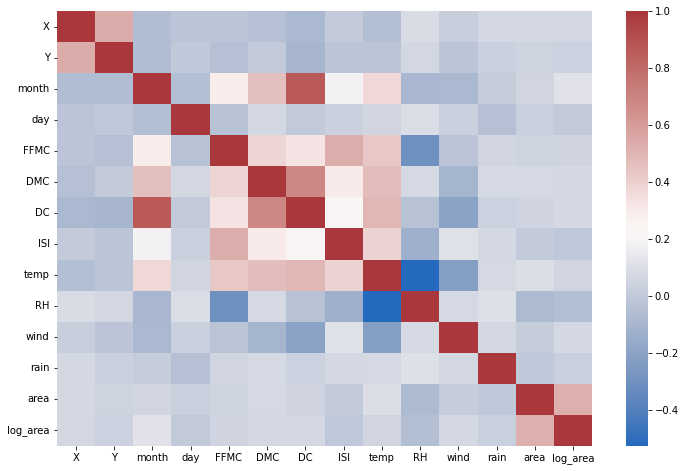

In [72]:
corr_matrix = forest_fires_data.corr(method='pearson')
corr_matrix

ax = plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, cmap='vlag')

In [61]:
# Preforming log transform of the area column to make results better
# 1 ha = 10000 m^2

In [62]:
forest_fires_data ['log_area'] = np.log(forest_fires_data['area'] + 1)

In [64]:
forest_fires_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000


In [66]:
forest_fires_data.to_csv('./cleaned_data/forestfires_cleaned.csv')

### Bike Sharing Hourly Data Set

In [ ]:
# Info on this set can be found @ https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
# Target variable: "cnt" column -> number of bikes in use

In [ ]:
bike_sharing_df = pd.read_csv('./raw_data/og_data/bike_sharing_hour.csv')

In [ ]:
bike_sharing_df.isnull().values.any()

In [ ]:
bike_sharing_df.drop(["instant", "dteday"], axis = 1, inplace=True)

In [ ]:
bike_sharing_df

In [ ]:
# I visually inspected the data in excel and it looks fine so I am going to export to cleaned_data folder

In [ ]:
bike_sharing_df.to_csv('./cleaned_data/bike_sharing_hour_tmp.csv')

### Combined Cycle Power Plant Data Set (CCPP)

In [ ]:
# Info on this set can be found @ https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
# Target variable: "PE" column -> basically exectric output of the power plant

In [ ]:
CCPP_df = pd.read_csv('./raw_data/og_data/CCPP.csv')

In [ ]:
CCPP_df.isnull().values.any()

In [ ]:
# I visually inspected the data in excel and it looks fine so I am going to export to cleaned_data folder

In [ ]:
CCPP_df.to_csv('./cleaned_data/CCPP.csv')

### White Wine Quality Data Set

In [ ]:
# Info on this set can be found @ https://archive.ics.uci.edu/ml/datasets/wine+quality
# Target variable: "quality" column -> quality score of the wine

In [ ]:
wine_quality_df = pd.read_csv('./raw_data/winequality-white_fixed.csv')

In [ ]:
wine_quality_df.isnull().values.any()

In [ ]:
# I visually inspected the data in excel and it looks fine so I am going to export to cleaned_data folder

In [ ]:
wine_quality_df.to_csv('./cleaned_data/winequality-white_fixed.csv')